In [9]:
from IPython.display import Image

## przypomnienie - dane ustruktyryzowane

Na poprzednich zajęciach omawialiśmy wykorzystanie modelu regresji liniowej dla danych ustrukturyzowanych. 
W najprostszym przypadku dla jednej zmiennej X i jednej zmiennej celu moglibyśmy np. przypisać model w postaci: 

satysfakcja_z_zycia = $\alpha_0$ + $\alpha_1$ PKB_per_capita 

$\alpha_0$ nazywamy punktem odcięcia (_intercept_) albo punktem obciążenia (_bias_)


In [1]:
import numpy as np

np.random.seed(42) 
m = 100
X = 2*np.random.rand(m,1) 
a_0, a_1 = 4, 3 
y = a_0 + a_1 * X + np.random.randn(m,1) 

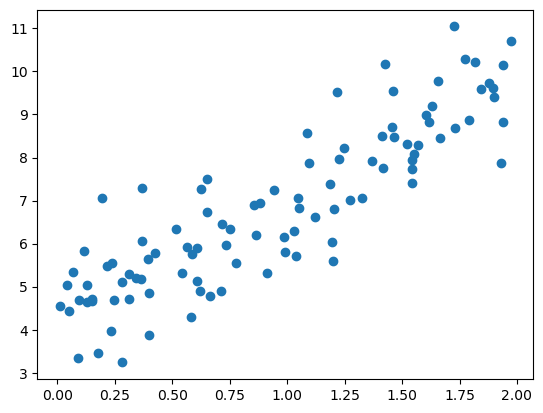

In [11]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.show()

W ogólności model liniowy: 
$\hat{y} = \alpha_0 + \alpha_1 x_1 + \alpha_2 x_2 + \dots + \alpha_n x_n$
gdzie $\hat{y}$ to predykcja naszego modelu (wartość prognozowana), dla $n$ cech przy wartościach cechy $x_i$. 

W postaci zwektoryzowanej możemy napisać: 
$\hat{y} = \vec{\alpha}^{T} \vec{x}$

W tej postaci widać dlaczego w tym modelu dokłada się kolumnę jedynek - wynikają one z wartości $x_0$ dla $\alpha_0$. 

In [2]:
# dodajmy jedynkę do naszej tabeli 
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)

Powiedzieliśmy, że możemy w tym modelu znaleźć funkcję kosztu 

$MSE(\vec{x}, \hat{y}) = \sum_{i=1}^{m} \left( \vec{\alpha}^{T} \vec{x}^{(i)} - y^{(i)} \right)^{2}$

Tak naprawdę możemy $MSE(\vec{x}, \hat{y}) = MSE(\vec{\alpha})$

Rozwiązanie analityczne: 
$\vec{\alpha} = (X^{T}X)^{-1} X^T y$

In [3]:
# rozwiązanie analityczne 
alpha_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [4]:
alpha_best, np.array([4,3])

(array([[4.21509616],
        [2.77011339]]),
 array([4, 3]))

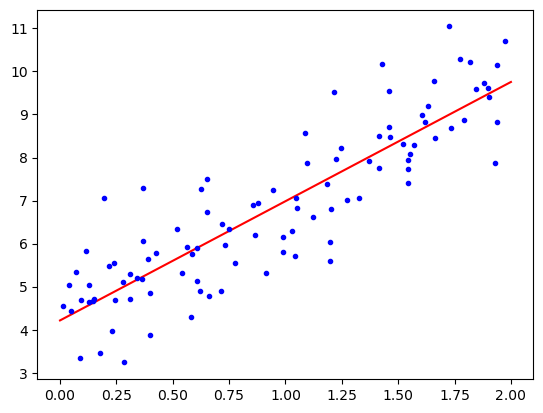

In [5]:
X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ alpha_best

import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-", label="prediction")
plt.plot(X,y, "b.")
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y) 

print(f"a_0={lin_reg.intercept_[0]}, a_1 = {lin_reg.coef_[0][0]}")

print("predykcja", lin_reg.predict(X_new))

a_0=4.215096157546746, a_1 = 2.770113386438484
predykcja [[4.21509616]
 [9.75532293]]


In [7]:
# Logistic Regression w scikit learn oparta jest o metodę lstsq 
alpha_best_svd, _, _, _ = np.linalg.lstsq(X_b, y, rcond=1e-6)
alpha_best_svd

array([[4.21509616],
       [2.77011339]])

## Gradient prosty

Pamiętaj o standaryzacji zmiennych (aby były one reprezentowane w tej samej skali). 

### Wsadowy gradient prosty

W celu implementacji musimy policzyć pochodne cząstkowe dla funkcji kosztu wobec każdego parametru $\alpha_i$.

$\frac{\partial}{\partial \alpha_j}MSE(\vec{x}, \hat{y}) = 2 \sum_{i=1}^{m} \left( \vec{\alpha}^{T} \vec{x}^{(i)} - y^{(i)} \right) x_j^{(i)}$

Komputery posiadają własność mnożenia macierzy co pozwala obliczyć nam wszystkie pochodne w jednym obliczeniu. Wzór i algorytm liczący wszystkie pochodne "na raz" wykorzystuje cały zbiór X dlatego też nazywamy go **wsadowym**.

Po obliczeniu gradientu po prostu idziemy "w przeciwną stronę" 

$ \alpha_{next} = \alpha - \eta \nabla_{\alpha} MSE(\alpha)$

In [8]:
Image(filename='./img/02_10.png', width=500) 

NameError: name 'Image' is not defined

In [9]:
eta = 0.1
n_epochs = 1000
m = len(X_b)
np.random.seed(42) 
alpha = np.random.randn(2,1) # losowo wybieramy rozwiązanie

for epoch in range(n_epochs):
    gradients = 2/m* X_b.T @ (X_b @ alpha - y)
    #print(alpha)
    alpha = alpha - eta*gradients

In [10]:
alpha

array([[4.21509616],
       [2.77011339]])

sprawdz jak wygladają wyniki dla różnych eta dla 0.02, 0.1, 0.5

## Stochastic gradient descent

Jednym z poważniejszych problemów wsadowego gradientu jest jego zależność od wykorzystania (w każdym kroku) całej macierzy danych. Korzystając z własności statystycznych możemy zobaczyć jak będzie realizowała się zbieżność rozwiązania jeśli za każdym razem wylosujemy próbkę danych i na niej określimy gradient. Ze względu, iż w pamięci przechowujemy tylko pewną porcję danych algorytm ten może być używany dla bardzo dużych zbiorów danych. Warto jednak mieć świadomość, że tak otrzymane wyniki mają charakter chaotyczny, co oznacza, że funkcja kosztu nie zbiega się w kierunku minimum lecz przeskakuje dążąc do minimun w sensie średniej. 


In [11]:
n_epochs = 50
m = len(X_b)


def learning_schedule(t, t0=5, t1=50):
    return t0/(t+t1)

np.random.seed(42)
alpha = np.random.randn(2,1)

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1] 
        gradients = 2 * xi.T @ (xi @ alpha - yi)
        eta = learning_schedule(epoch * m + iteration) 
        alpha = alpha - eta * gradients
        


In [12]:
alpha

array([[4.21076011],
       [2.74856079]])

In [13]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, 
                       penalty=None, eta0=0.01, 
                       n_iter_no_change=100, random_state=42)

sgd_reg.fit(X, y.ravel())

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [14]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

## Perceptron i OOP


In [15]:
from random import randint

class Kosc():
    """opis"""
    def __init__(self, sciany=6):
        """ ops metody """
        self.sciany = sciany
        
    def roll(self):
        """opis metody """
        return randint(1,self.sciany)

a = Kosc()
[a.roll() for _ in range(10)]

[5, 4, 3, 3, 4, 6, 5, 2, 3, 4]

In [16]:
from random import choice

class RandomWalk():
    def __init__(self, num_points=5000):
        self.num_points = num_points
        self.x_values = [0]
        self.y_values = [0]
    
    def fill_walk(self):
        while len(self.x_values) < self.num_points:
            x_direction = choice([-1,1])
            x_distance = choice([0,1,2,3,4])
            x_step = x_direction*x_distance
            
            y_direction = choice([-1,1])
            y_distance = choice([0,1,2,3,4])
            y_step = y_direction*y_distance
            
            if x_step == 0 and y_step == 0:
                continue
            
            next_x = self.x_values[-1] + x_step
            next_y = self.y_values[-1] + y_step
            
            self.x_values.append(next_x)
            self.y_values.append(next_y)

rw = RandomWalk()
rw.x_values
rw2 = RandomWalk(num_points=10000)
rw2.num_points

rw.fill_walk()

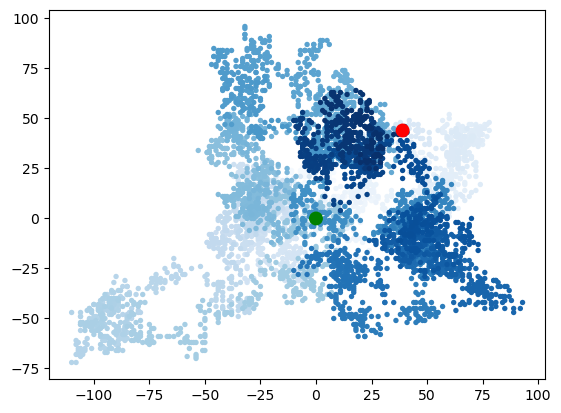

In [17]:
import matplotlib.pyplot as  plt
point_number = list(range(rw.num_points))
plt.scatter(rw.x_values, rw.y_values, c=point_number, cmap=plt.cm.Blues,
           edgecolor='none', s=15)
plt.scatter(0,0,c='green', edgecolor='none', s=100)
plt.scatter(rw.x_values[-1], rw.y_values[-1],c='red', edgecolor='none', s=100)

plt.show()

### Sztuczne neurony - rys historyczny

W 1943 roku W. McCulloch i W. Pitts zaprezentowali pierwszą koncepcję uproszczonego modelu komórki nerwowej tzw. **Nuronu McCulloch-Pittsa** (MCP). [W.S. McCulloch, W. Pitts, A logical Calculus of the Ideas Immanent in Nervous Activity. "The Bulletin of Mathematical Biophysics" 1943 nr 5(4)](https://www.cs.cmu.edu/~./epxing/Class/10715/reading/McCulloch.and.Pitts.pdf)

Neuronami nazywamy wzajemnie połączone komórki nerwowe w mózgu, które są odpowiedzialne za przetwarzanie i przesyłanie sygnałów chemicznych i elektrycznych. Komórka taka opisana jest jako bramka logiczna zawierająca binarne wyjścia. Do dendrytów dociera duża liczba sygnałów, które są integrowane w ciele komórki i (jeżeli energia przekracza określoną wartość progową) zostaje wygenerowany sygnał wyjściowy przepuszczany przez akson.

In [18]:
Image(filename='./img/02_01.png', width=800) 

NameError: name 'Image' is not defined

Po kilku latach Frank Rosenblatt (na podstawie MCP) zaproponował pierwszą koncepcję reguły uczenia perceprtonu. [F. Rosenblatt, The Perceptron, a Perceiving and Recognizing Automaton, Cornell Aeronautical Laboratory, 1957](https://blogs.umass.edu/brain-wars/files/2016/03/rosenblatt-1957.pdf)


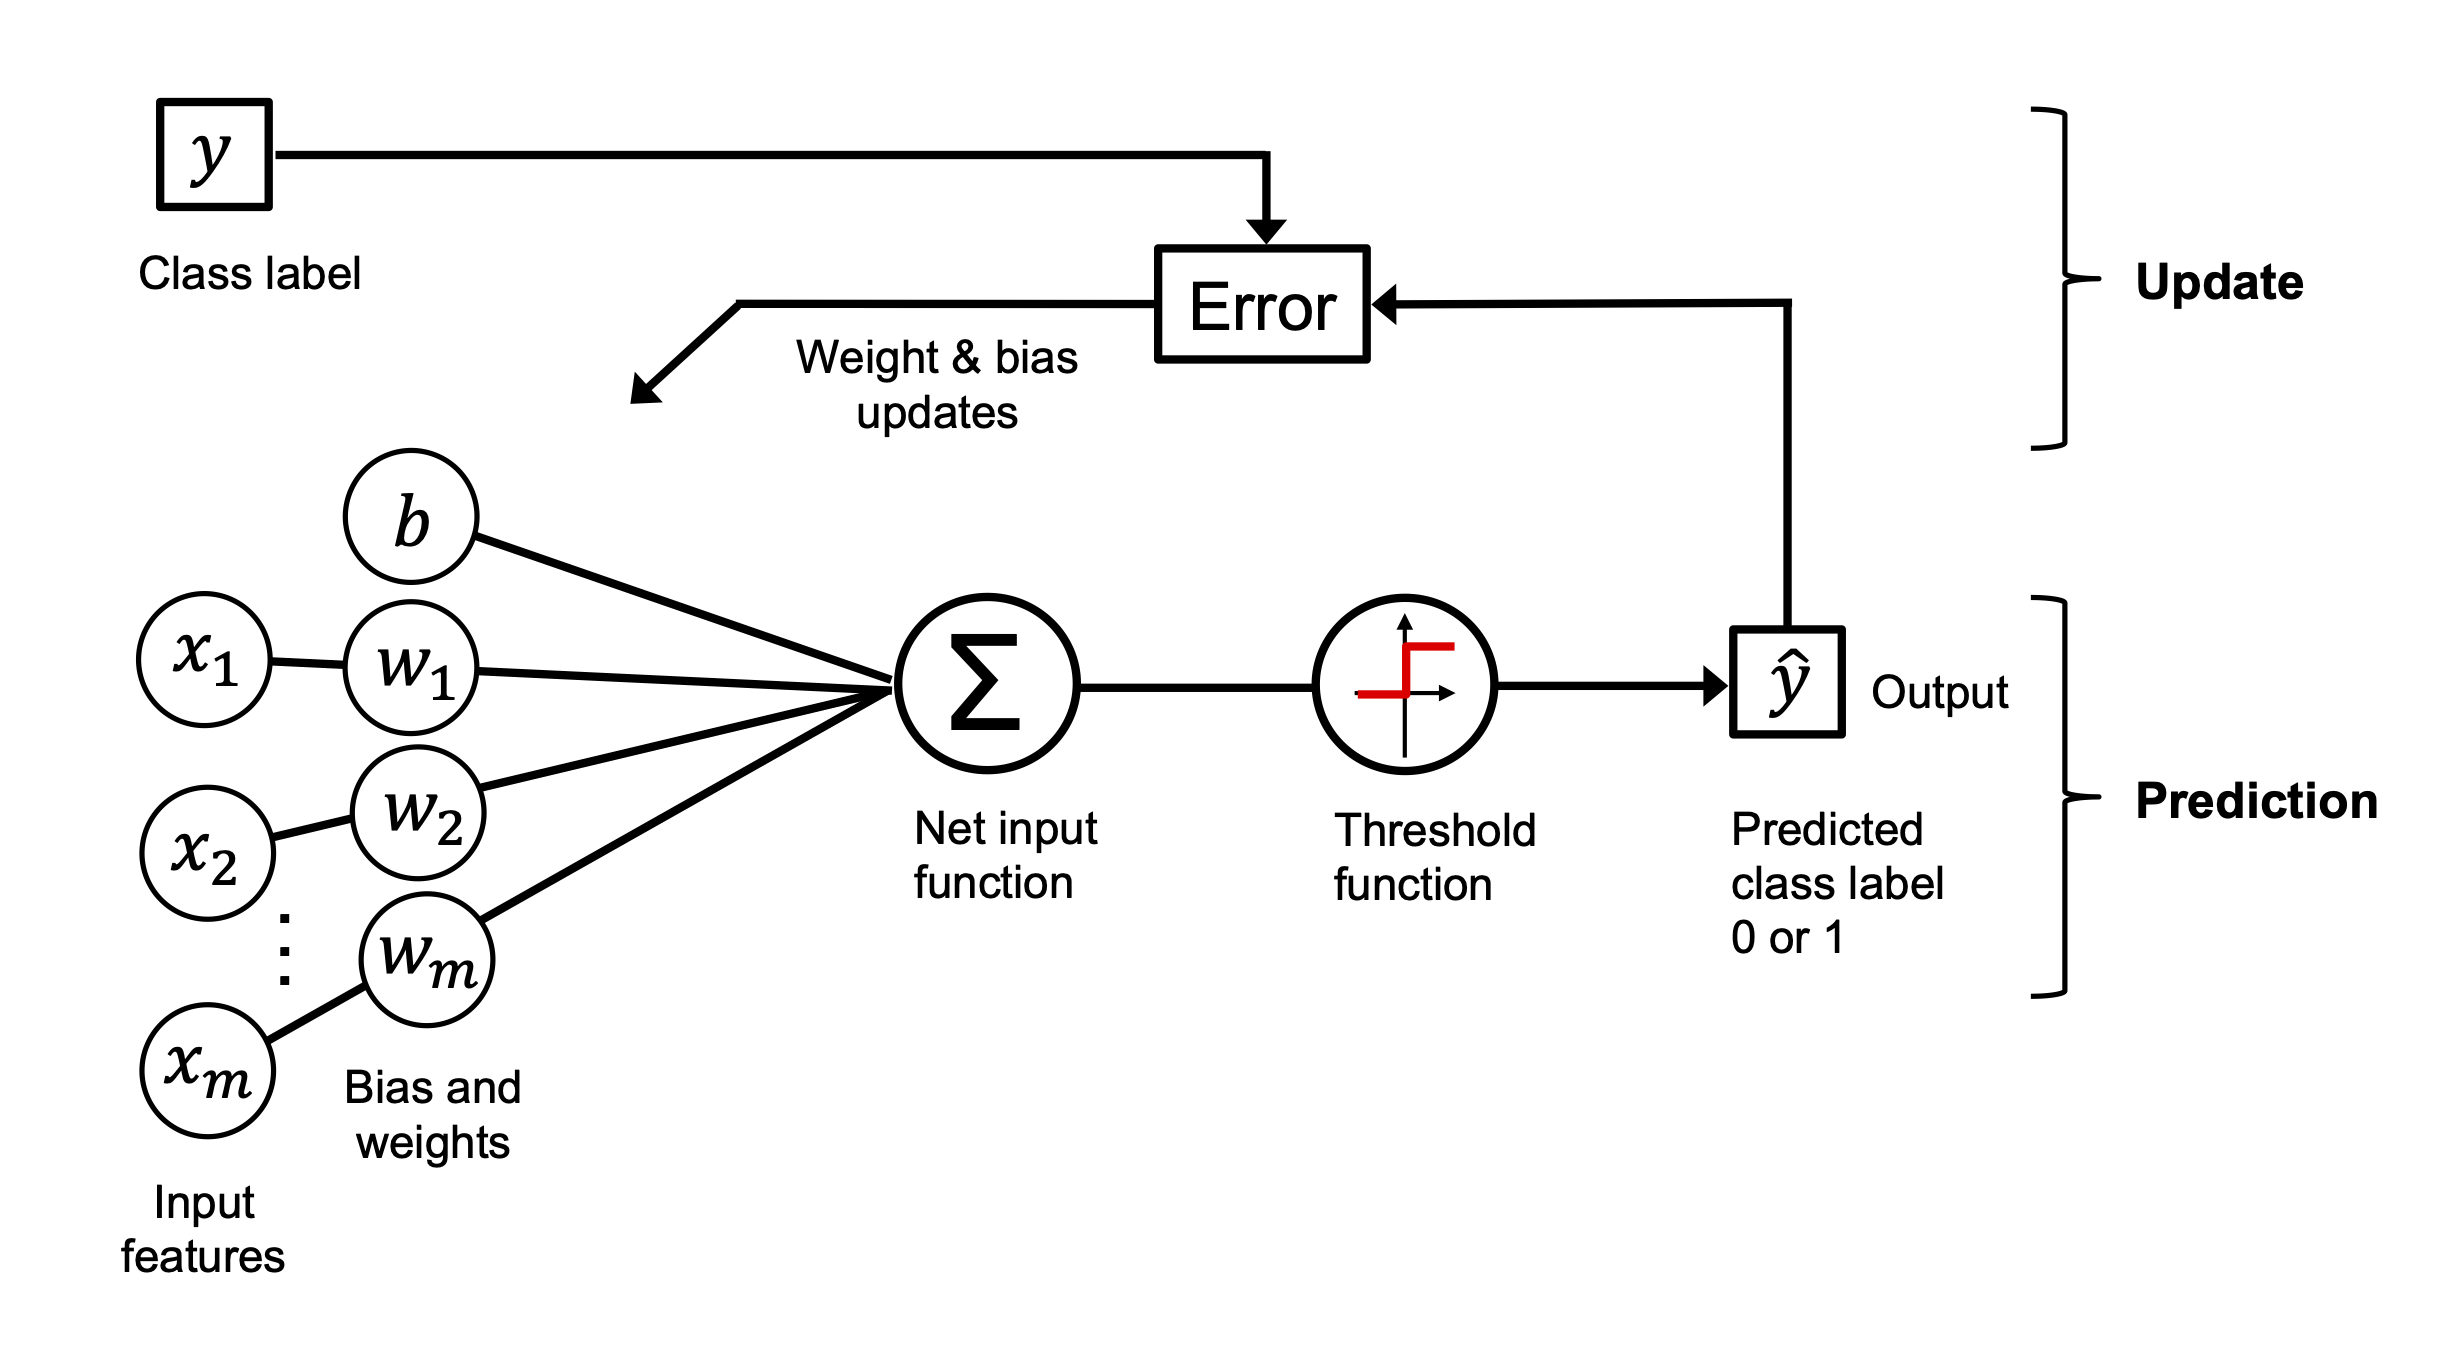

In [6]:
 Image(filename='./img/02_04.png', width=800) 

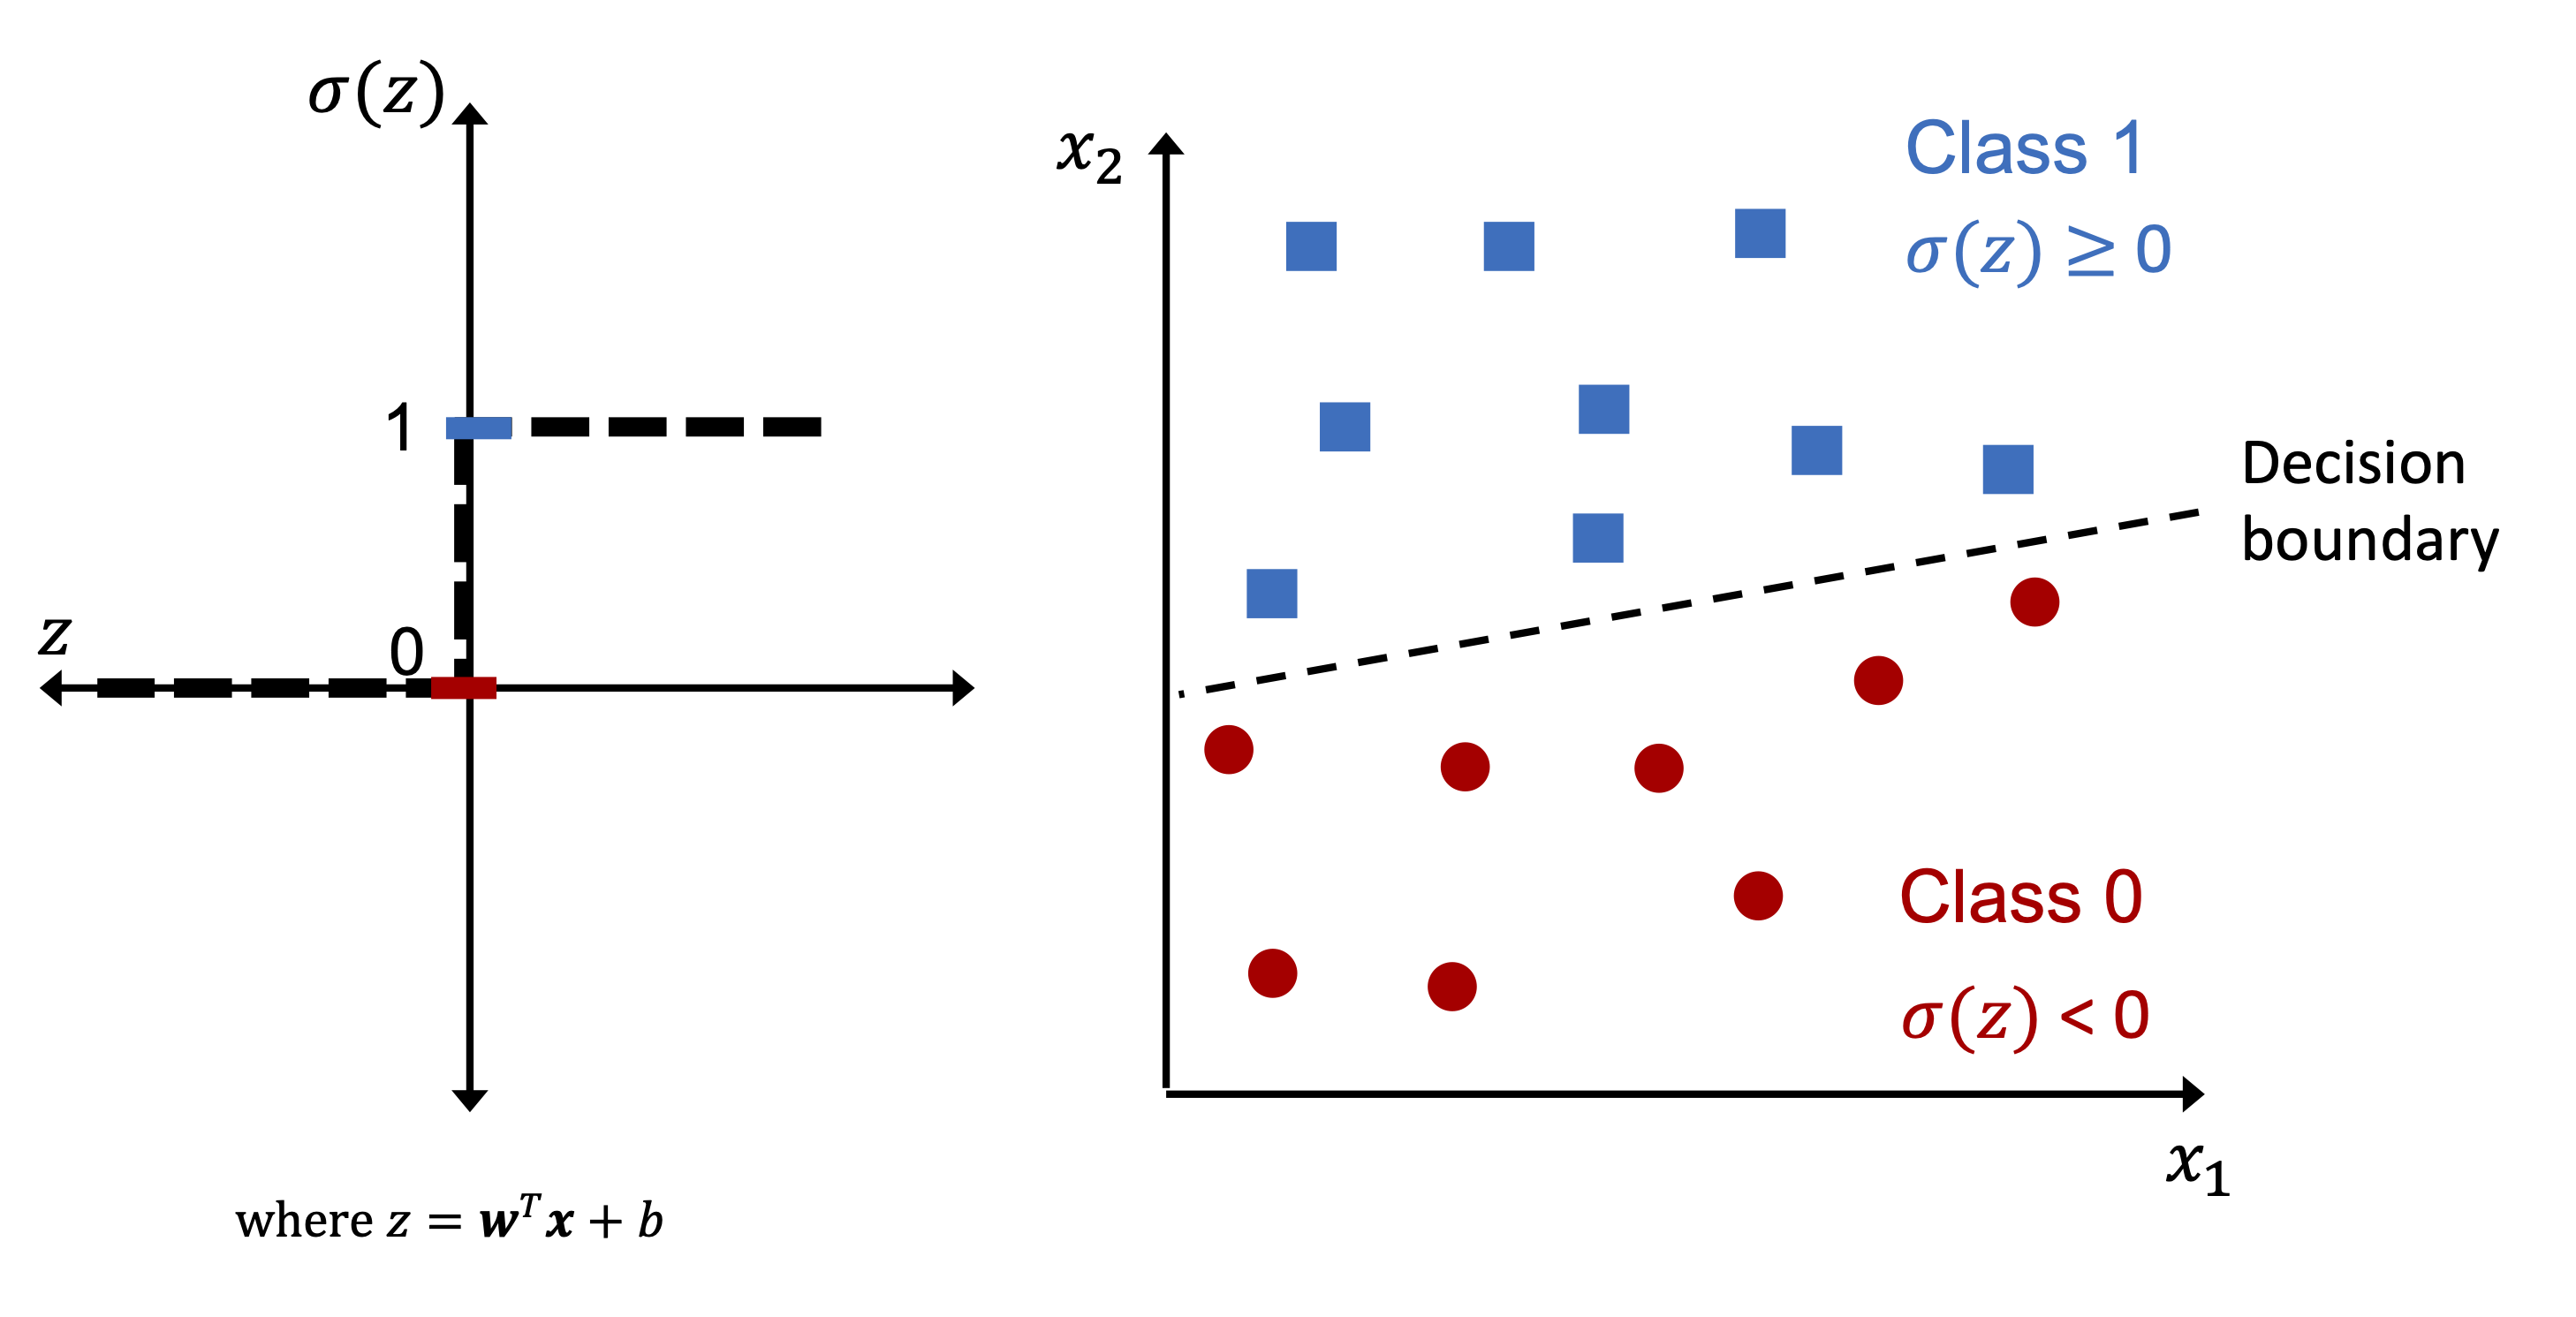

In [4]:
Image(filename='./img/02_02.png', width=800) 

In [19]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                  columns= iris['feature_names'] + ['target'])

In [20]:
X = df.iloc[:100,[0,2]].values
y = df.iloc[0:100,4].values
y = np.where(y == 0, -1, 1)

import matplotlib.pyplot as plt

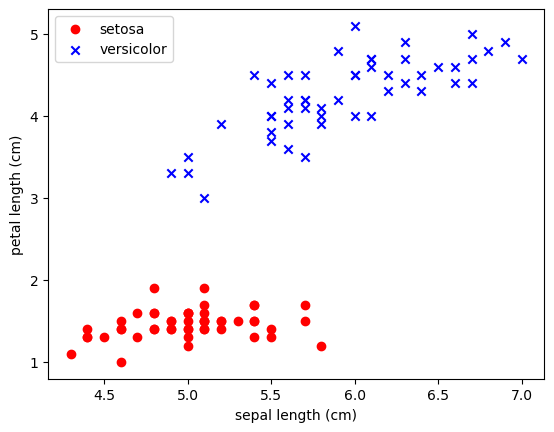

In [21]:
plt.scatter(X[:50,0],X[:50,1],color='red', marker='o',label='setosa')
plt.scatter(X[50:100,0],X[50:100,1],color='blue', marker='x',label='versicolor')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend(loc='upper left')
plt.show()

```{python}
dziecko = Perceptron()
dziecko.fit()

# dziecko musi mieć parametr uczenia
dziecko.eta

# możemy sprawdzić jak szybko się uczy == ile błędów robi

dziecko.errors_ 

# rozwiązania znajdą się w wagach
dziecko.w_
# w naszym przypadku dziecko uczy się dwóch wag !

```

In [22]:
class Perceptron():
    def __init__(self, n_iter=10, eta=0.01):
        self.n_iter = n_iter
        self.eta = eta
        
    def fit(self, X, y):
        self.w_ = np.zeros(1+X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            pass
        return self

In [23]:
import random

class Perceptron():
    
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        
        #self.w_ = np.zeros(1+X.shape[1])
        self.w_ = [random.uniform(-1.0, 1.0) for _ in range(1+X.shape[1])] 
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                #print(xi, target)
                update = self.eta*(target-self.predict(xi))
                #print(update)
                self.w_[1:] += update*xi
                self.w_[0] += update
                #print(self.w_)
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:])+self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X)>=0.0, 1, -1)

In [24]:
# uzycie jak wszsytkie klasy sklearn
ppn = Perceptron()
ppn.fit(X,y)

In [25]:
print(ppn.errors_)
print(ppn.w_)

[2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[-0.9605606645599309, 0.08257199627646036, 0.24082825780506448]


In [26]:
ppn.predict(np.array([-3, 5]))

array(-1)

In [27]:
# save model
import pickle
with open('model.pkl', "wb") as picklefile:
    pickle.dump(ppn, picklefile)

In [28]:
# dodatkowa funkcja

from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y,classifier, resolution=0.02):
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max()+1
    x2_min, x2_max = X[:,1].min() -1, X[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl,0], y=X[y==cl,1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

# dla kwiatków

/var/folders/ml/k8ct59ys439g34vd6tfbrfz00000gn/T/ipykernel_18810/2939353802.py:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl,0], y=X[y==cl,1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)


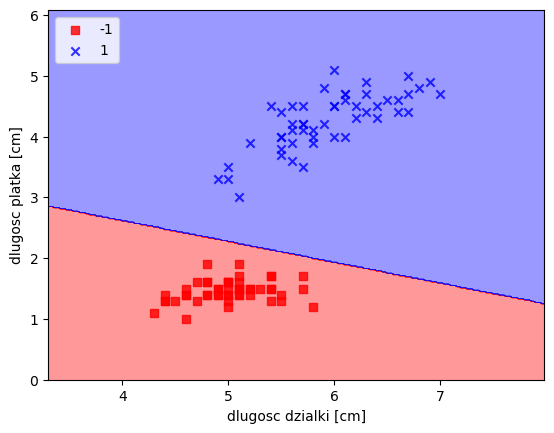

In [29]:
plot_decision_regions(X,y,classifier=ppn)
plt.xlabel("dlugosc dzialki [cm]")
plt.ylabel("dlugosc platka [cm]")
plt.legend(loc='upper left')
plt.show()

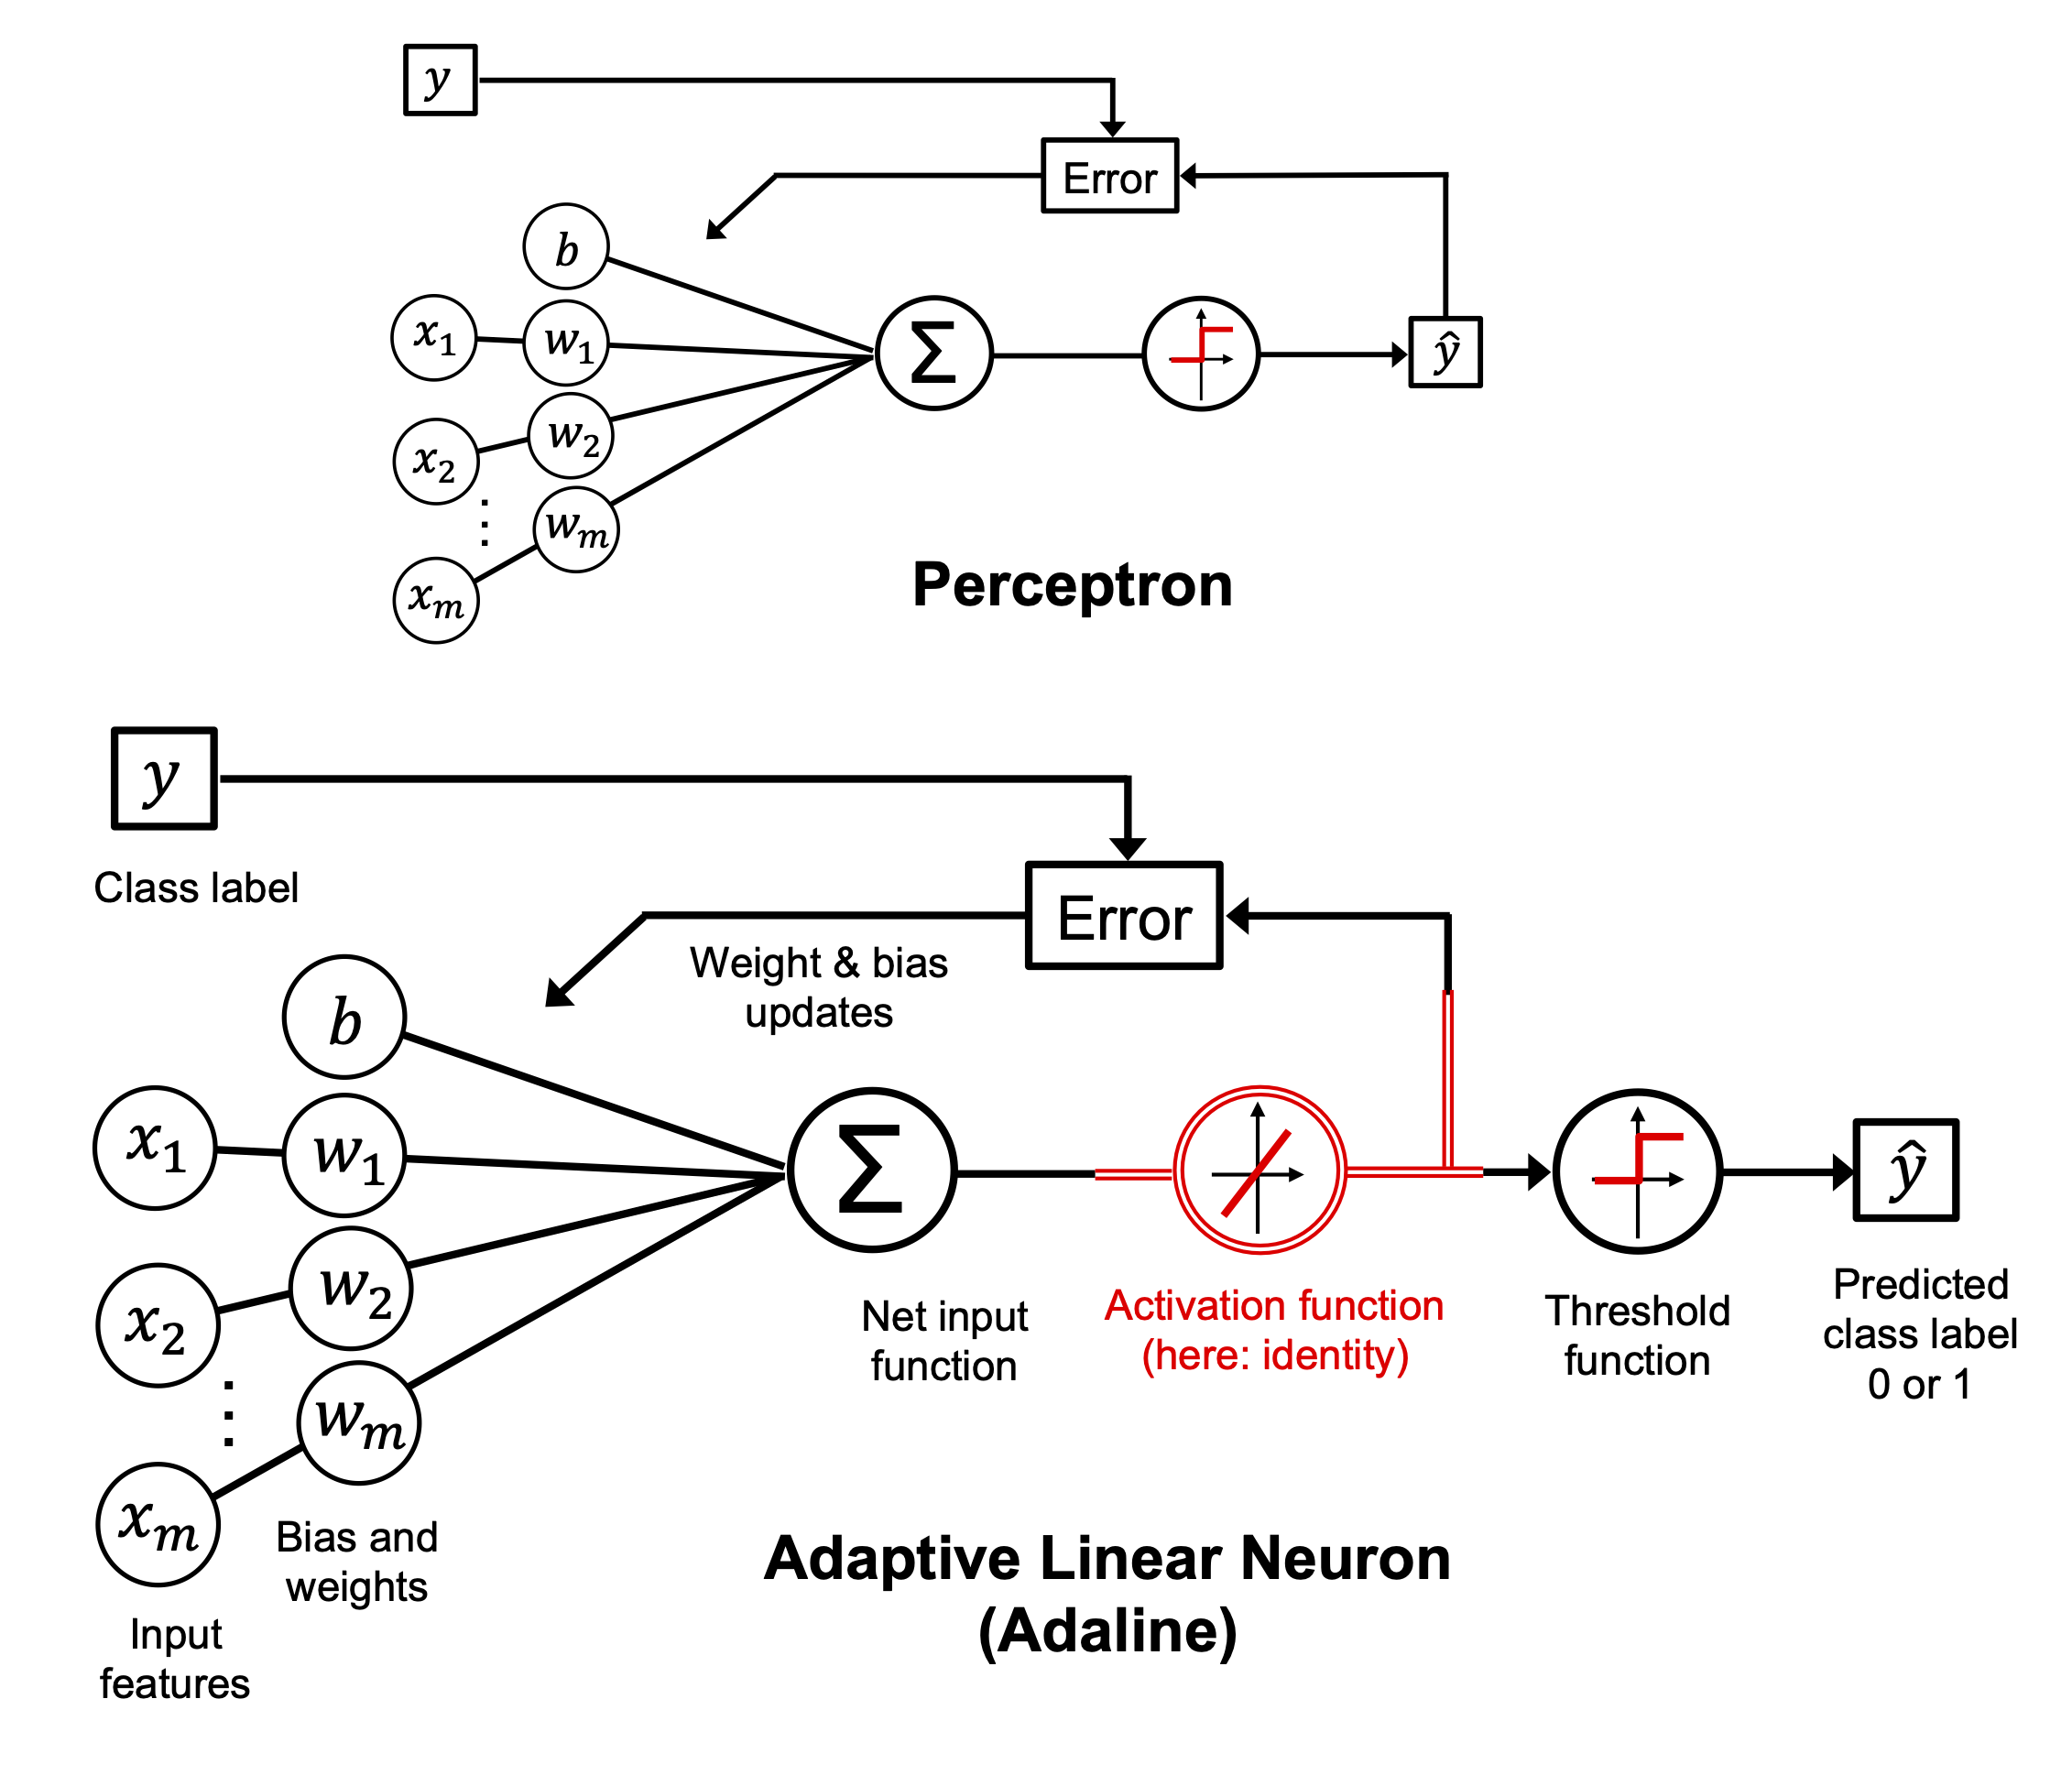

In [8]:
Image(filename='./img/02_09.png', width=600) 

In [30]:
# ZADANIE - Opisz czym różni się poniższy algorytm od Perceprtona ? 
class Adaline():
    '''Klasyfikator  - ADAptacyjny LIniowy NEuron'''
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X,y):
        #self.w_ = np.zeros(1+X.shape[1])
        import random
        self.w_ = [random.uniform(-1.0, 1.0) for _ in range(1+X.shape[1])]
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(X)
            errors = (y-output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1) 

[-1.1398638852956585e+31, -6.366086979684033e+31, -3.5617291993412953e+31]


/var/folders/ml/k8ct59ys439g34vd6tfbrfz00000gn/T/ipykernel_18810/2939353802.py:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl,0], y=X[y==cl,1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)


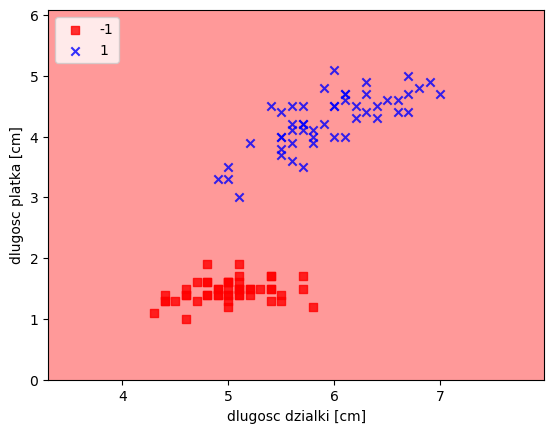

In [31]:
ad = Adaline(n_iter=20, eta=0.01)

ad.fit(X,y)

print(ad.w_)

plot_decision_regions(X,y,classifier=ad)
plt.xlabel("dlugosc dzialki [cm]")
plt.ylabel("dlugosc platka [cm]")
plt.legend(loc='upper left')
plt.show()

In [32]:
ad.cost_[:10]

[1529.3016815589224,
 2367279.783415264,
 3692616584.607169,
 5759958034642.421,
 8984717428180216.0,
 1.4014884618736945e+19,
 2.18612318580499e+22,
 3.4100420470995374e+25,
 5.3191818459694566e+28,
 8.297169102227536e+31]

/var/folders/ml/k8ct59ys439g34vd6tfbrfz00000gn/T/ipykernel_18810/2939353802.py:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl,0], y=X[y==cl,1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)


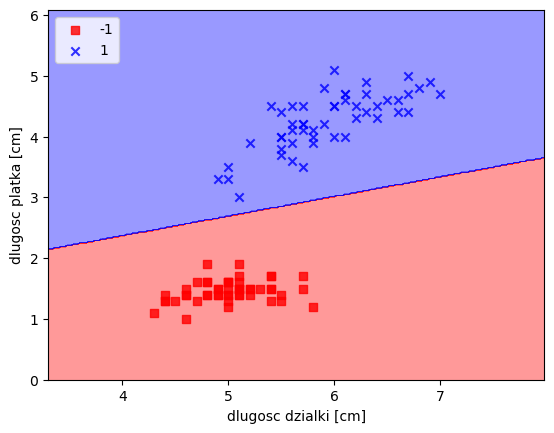

In [33]:
ad2 = Adaline(n_iter=100, eta=0.0001)

ad2.fit(X,y)

plot_decision_regions(X,y,classifier=ad2)
plt.xlabel("dlugosc dzialki [cm]")
plt.ylabel("dlugosc platka [cm]")
plt.legend(loc='upper left')
plt.show()

In [34]:
print(ad2.w_)

ad2.cost_[-10:]

[-0.7586802264658781, -0.22650208173241326, 0.7027131199389023]


[2.8020010400493756,
 2.793876287128854,
 2.78592985508585,
 2.7781578300577014,
 2.7705563840848884,
 2.76312177322559,
 2.7558503357116315,
 2.7487384901448975,
 2.741782733733339,
 2.734979640565693]

In [1]:
%%file app.py

import pickle
import numpy as np
from flask import Flask, request, jsonify

class Perceptron():
    
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        self.w_ = [random.uniform(-1.0, 1.0) for _ in range(1+X.shape[1])] 
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta*(target-self.predict(xi))
                self.w_[1:] += update*xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:])+self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X)>=0.0, 1, -1)

# Create a flask
app = Flask(__name__)

# Create an API end point
@app.route('/predict_get', methods=['GET'])
def get_prediction():
    # sepal length
    sepal_length = float(request.args.get('sl'))
    petal_length = float(request.args.get('pl'))
    
    features = [sepal_length, petal_length]

    # Load pickled model file
    with open('model.pkl',"rb") as picklefile:
        model = pickle.load(picklefile)
        
    # Predict the class using the model
    predicted_class = int(model.predict(features))
    
    # Return a json object containing the features and prediction
    return jsonify(features=features, predicted_class=predicted_class)

@app.route('/predict_post', methods=['POST'])
def post_predict():
    data = request.get_json(force=True)
    # sepal length
    sepal_length = float(data.get('sl'))
    petal_length = float(data.get('pl'))
    
    features = [sepal_length, petal_length]

    # Load pickled model file
    with open('model.pkl',"rb") as picklefile:
        model = pickle.load(picklefile)
        
    # Predict the class using the model
    predicted_class = int(model.predict(features))
    output = dict(features=features, predicted_class=predicted_class)
    # Return a json object containing the features and prediction
    return jsonify(output)


if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)

Writing app.py


In [8]:
import requests
response = requests.get("http://127.0.0.1:5000/predict_get?sl=2.4&pl=2.6")
print(response.content)

b'{"features":[2.4,2.6],"predicted_class":-1}\n'


In [9]:
import requests
json = {"sl":2.4, "pl":2.6}
response = requests.post("http://127.0.0.1:5000/predict_post", json=json)
print(response.content)

b'{"features":[2.4,2.6],"predicted_class":-1}\n'
